# Week 2 Building Composition - Han Zhang

---

### Summary
This notebook examines how the building composition in the Chicago Energy benchmarking dataset changes over the years.

## Section 1: Data Setup

In [1]:
# Third-party imports
import seaborn as sns

# Local application imports
from utils.data_utils import load_data
from utils.plot_utils import plot_bar

# Load in the data
energy_df = load_data()

energy_df

,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Reporting Status,Chicago Energy Rating,Exempt From Chicago Energy Rating,Water Use (kGal),Row_ID
18573,2014,103748,nmh olson pavilion,710 N Fairbanks Ct,60611,near north side,laboratory,362800.0,1977.0,1.0,...,21444.0,59.11,41.895310,-87.620363,point (-87.620363 41.89531),submitted,NaN,nan,NaN,2014-103748
18503,2014,101923,311 west monroe,311 West Monroe,60606,loop,office,411672.0,1969.0,1.0,...,11363.0,27.60,41.880305,-87.635701,point (-87.63570062 41.88030523),submitted,NaN,nan,NaN,2014-101923
18504,2014,100851,600 w chicago,600 W Chicago,60654,near north side,office,1434236.0,1908.0,1.0,...,25200.0,17.57,41.896501,-87.642880,point (-87.64288 41.896501),submitted,NaN,nan,NaN,2014-100851
18505,2014,103632,nmh feinberg pavilion and galter pavilion,251 E Huron St.,60654,near north side,hospital (general medical & surgical),2200000.0,1999.0,1.0,...,51047.0,23.20,41.894587,-87.621528,point (-87.62152834 41.89458666),submitted,NaN,nan,NaN,2014-103632
18506,2014,103608,329 w 18th street,329 W 18th Street,60616,lower west side,office,406780.0,1911.0,1.0,...,2652.0,6.52,41.857685,-87.636254,point (-87.636254 41.857685),submitted,NaN,nan,NaN,2014-103608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26040,2023,251626,albany park multicultural academy -cps,4929 N Sawyer Ave,60625,albany park,k-12 school,NaN,NaN,NaN,...,NaN,NaN,41.971080,-87.709407,point (-87.709407 41.97108),not covered 2024,NaN,true,NaN,2023-251626
26041,2023,103643,180 north lasalle,180 North Lasalle Street,60601,loop,office,859786.0,1972.0,1.0,...,4850.2,5.60,41.854615,-87.651322,point (-87.651322 41.854615),submitted,4.0,nan,2205.0,2023-103643
26042,2023,256438,tech business center,3440 S Dearborn Street,60616,douglas,commercial,NaN,NaN,NaN,...,NaN,NaN,41.976493,-87.655134,point (-87.655134 41.976493),not submitted,0.0,nan,NaN,2023-256438
26044,2023,251373,mitchell,2233 W Ohio St,60612,west town,k-12 school,56385.0,1892.0,2.0,...,223.5,4.00,41.953584,-87.743125,point (-87.743125 41.953584),submitted,4.0,nan,NaN,2023-251373


## Section 2: Building Counts per Year

/project/src/utils/plot_utils.py:150: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xticks)


(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Number of Buildings by Data Year'}, xlabel='Data Year', ylabel='Number of Buildings'>)

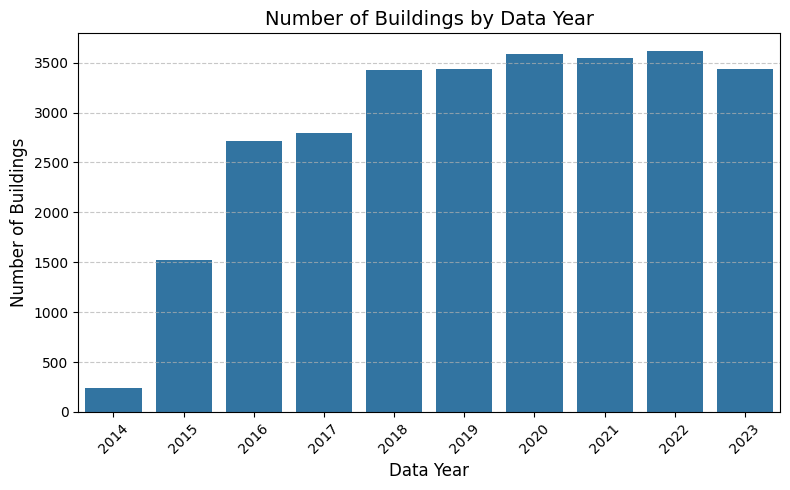

In [2]:
# Count building counts per year
building_counts_df = energy_df["Data Year"].value_counts().sort_index().reset_index()

# Create bar plot
plot_bar(
    data=building_counts_df,
    x="Data Year",
    y="count",
    title="Number of Buildings by Data Year",
    xlabel="Data Year",
    ylabel="Number of Buildings",
)

In [3]:
building_id_col = "ID"

# Find the first year each building appears
first_year = energy_df.groupby(building_id_col)["Data Year"].min().reset_index()

# Count how many buildings have their first appearance each year
new_buildings_per_year = (
    first_year["Data Year"].value_counts().sort_index().reset_index()
)
new_buildings_per_year.columns = ["Data Year", "New Buildings"]

# Check to confirm
print(new_buildings_per_year.head())

   Data Year  New Buildings
0       2014            243
1       2015           1287
2       2016           1253
3       2017            142
4       2018            560


/project/src/utils/plot_utils.py:150: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xticks)


(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Number of New Buildings by Data Year'}, xlabel='Data Year', ylabel='Number of Buildings'>)

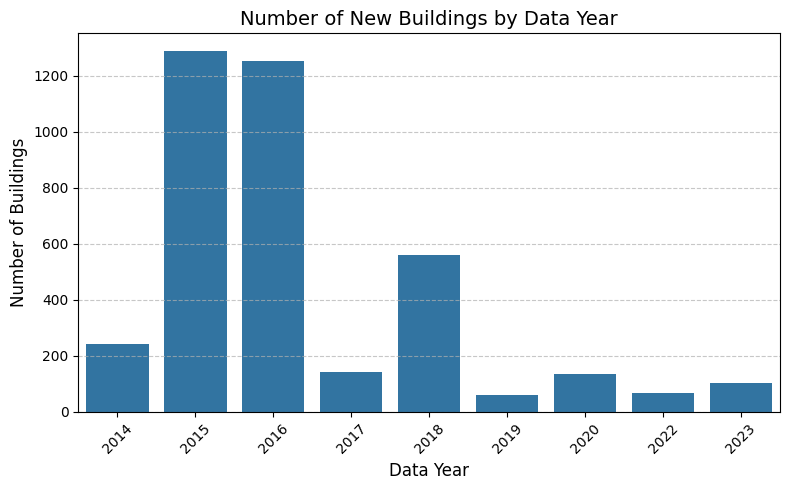

In [4]:
# Plot New Buildings per Year
plot_bar(
    data=new_buildings_per_year,
    x="Data Year",
    y="New Buildings",
    title="Number of New Buildings by Data Year",
    xlabel="Data Year",
    ylabel="Number of Buildings",
)

## Section 3: Building Types

In [5]:
energy_df["First Year"] = energy_df.groupby("ID")["Data Year"].transform("min")
# Filter for new buildings only
new_buildings_df = energy_df[energy_df["Data Year"] == energy_df["First Year"]]

all_property_types = new_buildings_df["Primary Property Type"].unique()

palette = sns.color_palette("hls", n_colors=len(all_property_types))
color_map = dict(zip(all_property_types, palette))

years = sorted(new_buildings_df["Data Year"].unique())

/project/src/utils/plot_utils.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette, ax=ax)
/project/src/utils/plot_utils.py:150: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xticks)
/project/src/utils/plot_utils.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette, ax=ax)
/project/src/utils/plot_utils.py:150: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax

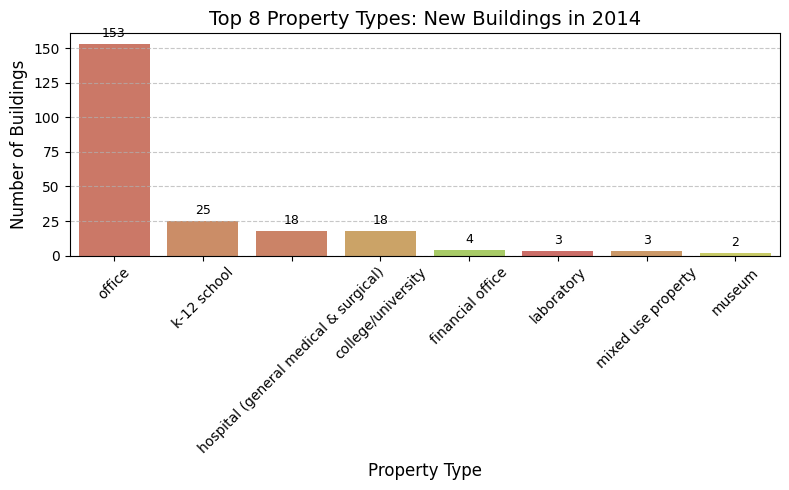

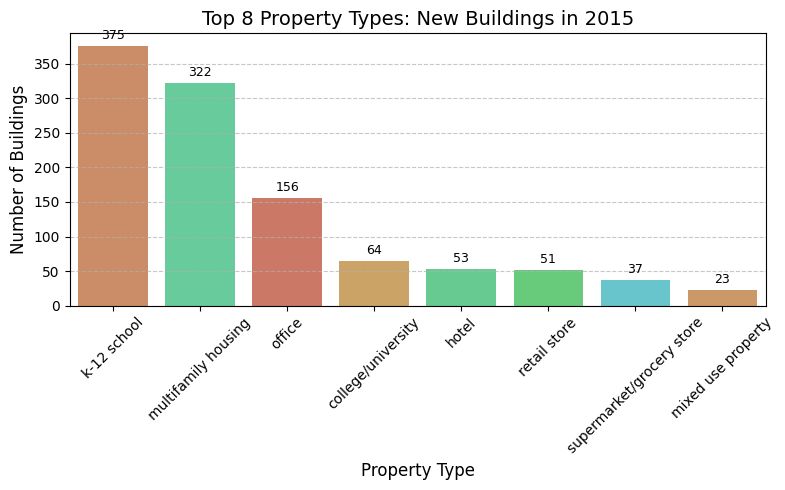

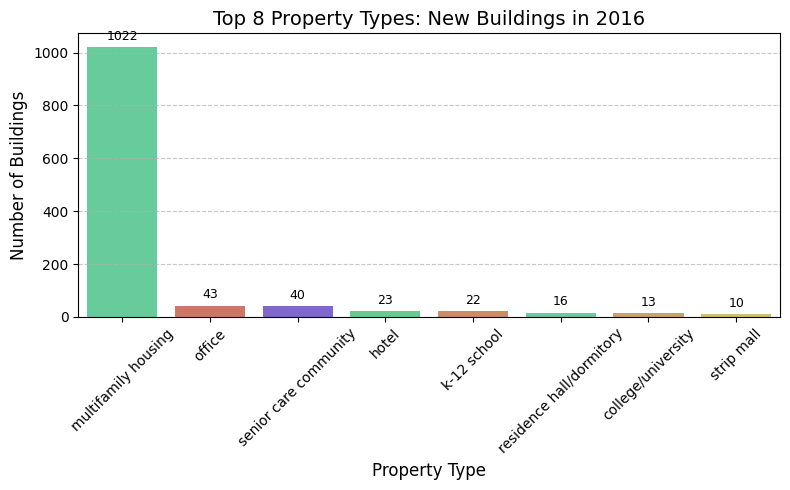

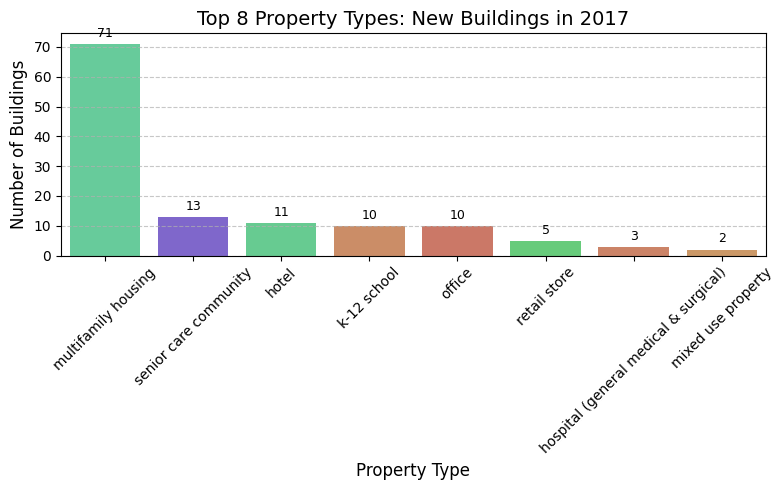

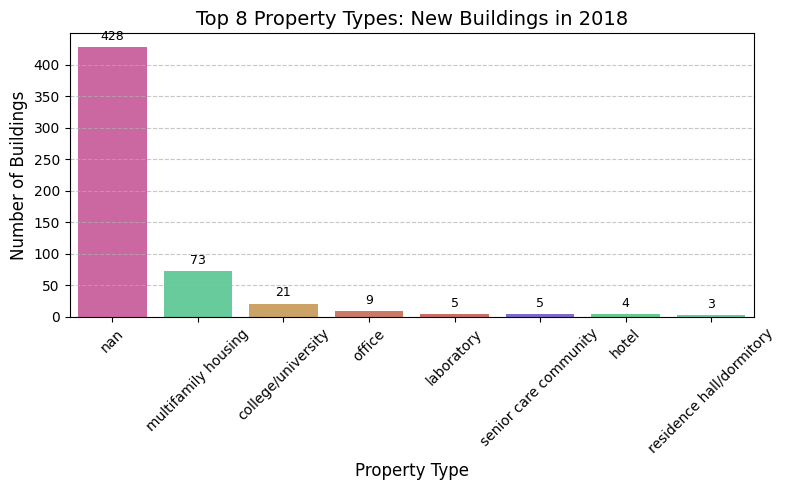

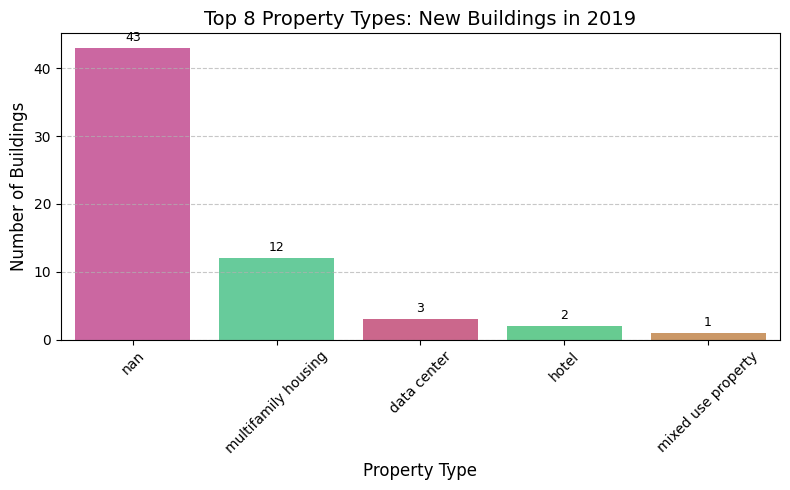

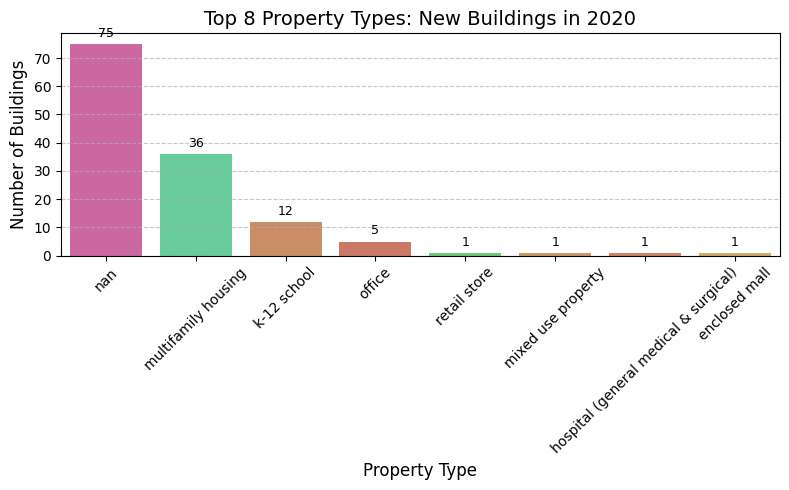

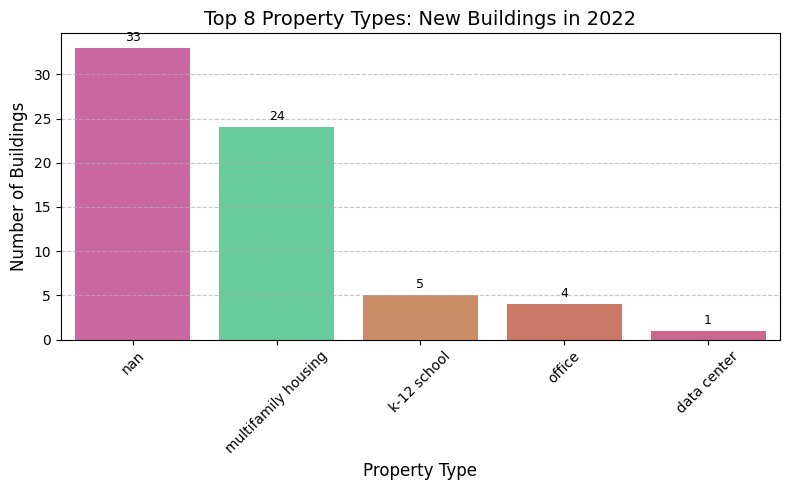

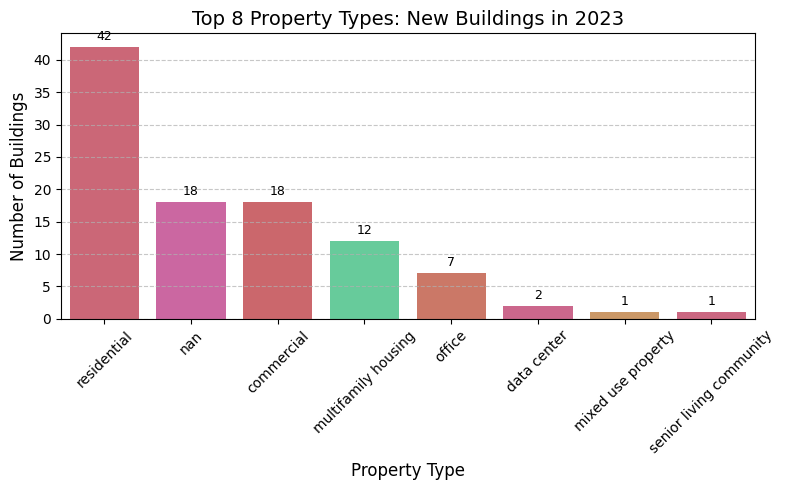

In [6]:
for year in years:
    year_df = new_buildings_df[new_buildings_df["Data Year"] == year]

    top8 = year_df["Primary Property Type"].value_counts().nlargest(8).reset_index()
    top8.columns = ["Primary Property Type", "Number of Buildings"]

    # Map colors specifically to these 8 types
    bar_colors = [color_map[ptype] for ptype in top8["Primary Property Type"]]

    # Plot each year separately
    plot_bar(
        data=top8,
        x="Primary Property Type",
        y="Number of Buildings",
        title=f"Top 8 Property Types: New Buildings in {year}",
        xlabel="Property Type",
        ylabel="Number of Buildings",
        palette=bar_colors,
        rotate_xticks=45,
        show_values=True,
    )

### Next Steps

Looking at the number of buildings by data year, we see that most of the data is added by 2018. However, something that might be worth looking further into are the dips going from 2020-2021 as well as 2022-2023. 

In addition to this, by looking into the top building types being added each year, we see that multi family housing is the most frequent addition to the data, while other types like `Office` and `K-12 schools` are added in mass early on. 